# Practice Code for group project

In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
tidedata = "ASTR19_F23_group_project_data.txt"
filein = open(tidedata,"r")
content = filein.readlines()



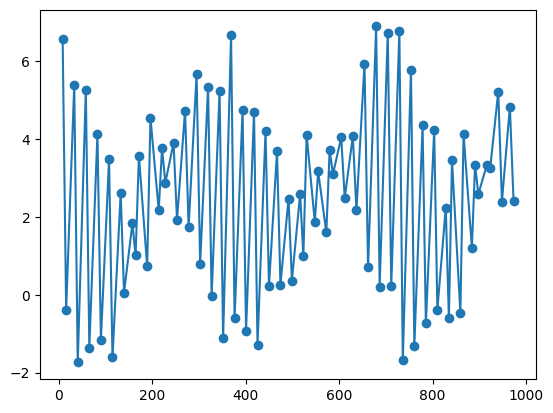

In [21]:

y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


for i in range(82):
    x.append( list2[i] +hours[i] + mins_converted[i])


plt.plot(x,y)
plt.scatter(x,y)

plt.show()

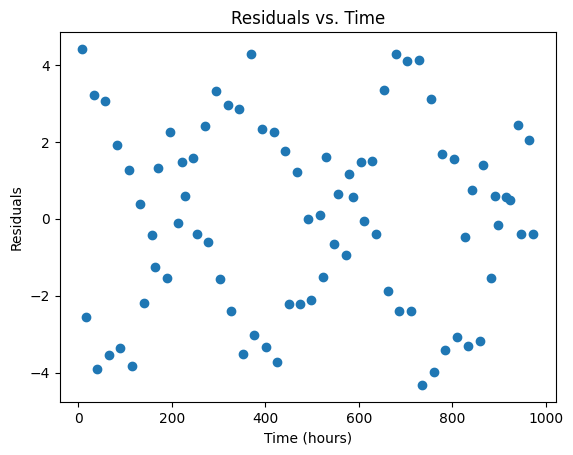

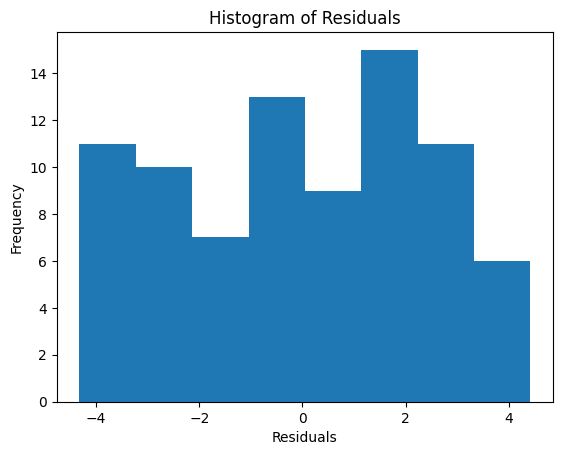

The scatter in the data is larger than the assumed experimental error.


In [25]:
#Logan -- work for question 3

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define your model function with variable parameters
def model_function(x, *params):
    x = np.array(x)  # Convert x to a NumPy array
    # Define your model using the parameters
    return params[0] * x + params[1]  # Example: Linear model y = mx + c

# Initial guess for parameters (slope and intercept for a linear model)
initial_guess = [1.0, 0.0]

# Fit the model to your data with initial guess
params, _ = curve_fit(model_function, x, y, p0=initial_guess)

# Calculate residuals
predicted_y = model_function(x, *params)
residuals = y - predicted_y

# Plotting residuals against x values
plt.figure()
plt.scatter(x, residuals)
plt.xlabel('Time (hours)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Time')
plt.show()

# Calculating statistical metrics
mean_abs_error = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))
r_squared = 1 - np.sum(residuals**2) / np.sum((y - np.mean(y))**2)

# Plotting histogram of residuals
plt.figure()
plt.hist(residuals, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculating standard deviation of residuals
std_deviation = np.std(residuals)

# Comparing scatter with assumed experimental error
assumed_error = 0.1  # Example assumed experimental error
if std_deviation > assumed_error:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is within the assumed experimental error.")

# Estimate